# group analysis for spike rates
* 1/27/24 setup

In [49]:
import sys
from os.path import join
from os import walk

from src import database as db
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
# sessions to be analyzed:
trials = [931, 937, 932]
behavior_files = [
    "140502_5_20240116110945_931_sleep.json",
    "140502_5_20240117113156_937_sleep.json",
    "140302_3_20240118121644_932_sleep.json",
]

In [24]:
imaging_paths = []
for trial in trials:
    imaging_paths.append(db.fetch_trial(trial)["tSeries_path"])
imaging_paths

['/data2/gergely/invivo_DATA/sleep/140502_5/1_16/TSeries-01162024-0853_dendrite-001',
 '/data2/gergely/invivo_DATA/sleep/140502_5/1_17/TSeries-01172024-0745_dendrites-001',
 '/data2/gergely/invivo_DATA/sleep/140302_3/1_18/TSeries-01182024-0805-003']

In [41]:
spike_rates = []
for imaging_path in imaging_paths:
    for root, dirs, files in walk(imaging_path):
        if "mobility_immobility_mean_spike_rate.json" in files:
            spike_rates.append(
                pd.read_json(join(root, "mobility_immobility_mean_spike_rate.json"))
            )

In [44]:
spike_rate_df = pd.concat(spike_rates, axis=0)
spike_rate_df

,Condition,Mean Value,Mean Rate,Condition_numeric
0,Moving,-0.078687,-0.000054,1
1,Not Moving,0.052731,0.000024,2
0,Moving,-0.053443,-0.000049,1
1,Not Moving,0.023236,0.000009,2
0,Moving,-0.101487,-0.000101,1
1,Not Moving,0.039429,0.000015,2


/home/gergely/anaconda3/envs/sleep/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gergely/anaconda3/envs/sleep/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/gergely/anaconda3/envs/sleep/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/gergely/anaconda3/envs/sleep/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You pa

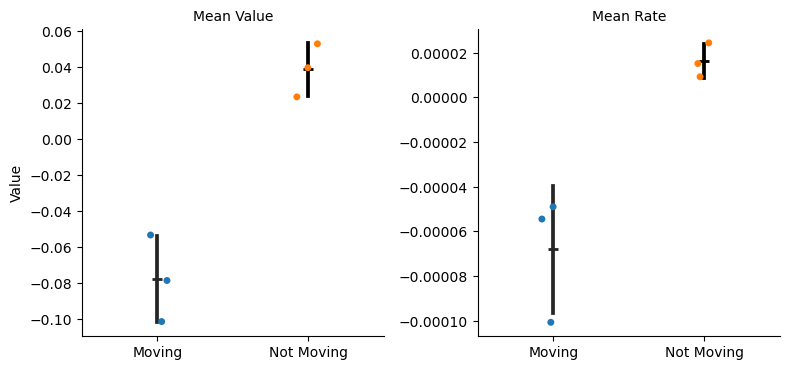

<Figure size 640x480 with 0 Axes>

In [62]:
df_long = pd.melt(
    spike_rate_df,
    id_vars=["Condition", "Condition_numeric"],
    var_name="Metric",
    value_name="Value",
)
# Create the Seaborn catplot
g = sns.catplot(
    x="Condition",
    y="Value",
    hue="Condition",
    col="Metric",
    data=df_long,
    kind="strip",
    height=4,
    aspect=1,
    sharey=False,
)

# Iterate over each subplot and overlay pointplot
for ax, metric in zip(g.axes.flat, df_long["Metric"].unique()):
    sns.pointplot(
        x="Condition",
        y="Value",
        hue="Condition",
        data=df_long[df_long["Metric"] == metric],
        errorbar="sd",
        join=False,
        color="k",
        markers="_",
        ax=ax,
    )
    ax.legend().remove()

# Adjust the plot aesthetics
g.set_axis_labels("", "Value")
g.set_titles("{col_name}")
plt.show()
plt.savefig("spike_rate.png")

In [47]:
df_long

,Condition,Condition_numeric,Metric,Value
0,Moving,1,Mean Value,-0.078687
1,Not Moving,2,Mean Value,0.052731
2,Moving,1,Mean Value,-0.053443
3,Not Moving,2,Mean Value,0.023236
4,Moving,1,Mean Value,-0.101487
5,Not Moving,2,Mean Value,0.039429
6,Moving,1,Mean Rate,-0.000054
7,Not Moving,2,Mean Rate,0.000024
8,Moving,1,Mean Rate,-0.000049
9,Not Moving,2,Mean Rate,0.000009
